# 2.1 Implementacion y visualizacion de k-means en 2D


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


Cargar la base de datos kmeans1.csv

In [2]:
kmeans1_data = pd.read_csv('kmeans.1.csv')
print(kmeans1_data.head())


          A         B
0 -3.032505 -3.367918
1 -2.603797 -1.616394
2 -1.357223 -0.199628
3 -2.992206 -3.523316
4 -1.708192 -1.007209


Grafico de dispersion, aplicando matplotlib para las variables A y B

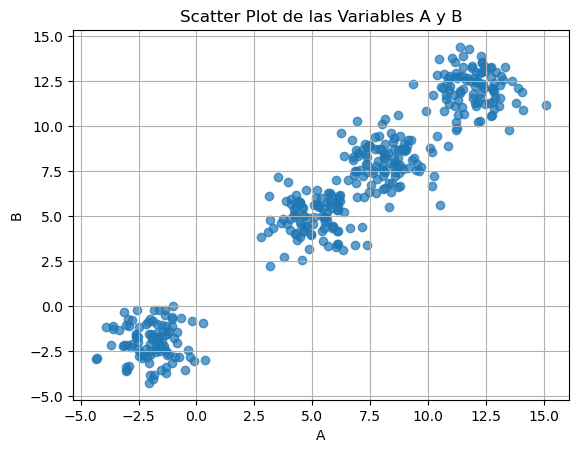

In [3]:
plt.scatter(kmeans1_data['A'], kmeans1_data['B'], alpha=0.7)
plt.title('Scatter Plot de las Variables A y B')
plt.xlabel('A')
plt.ylabel('B')
plt.grid(True)
plt.show()

Aplicar algoritmo k-means

c:\Users\user\anaconda3\envs\curso_ciencias_de_datos\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\curso_ciencias_de_datos\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\user\anaconda3\envs\curso_ciencias_de_datos\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\user\anaconda3\envs\curso_ciencias_de_datos\lib\site-packages\sklearn\

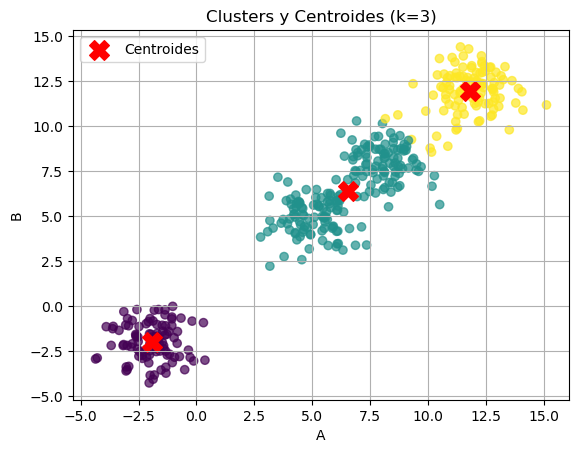

In [ ]:
#from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(kmeans1_data)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualizar los clusters y los centroides
plt.scatter(kmeans1_data['A'], kmeans1_data['B'], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title('Clusters y Centroides (k=3)')
plt.xlabel('A')
plt.ylabel('B')
plt.legend()
plt.grid(True)
plt.show()

Ajuste k-means considerando 1,2,...10 clusters

In [ ]:
inertia_values = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(kmeans1_data)
    inertia_values[k] = kmeans.inertia_

Utilizando matplotlib (o seaborn) genere un grafico que presente la distancia intra clases para cada
k utilizado.

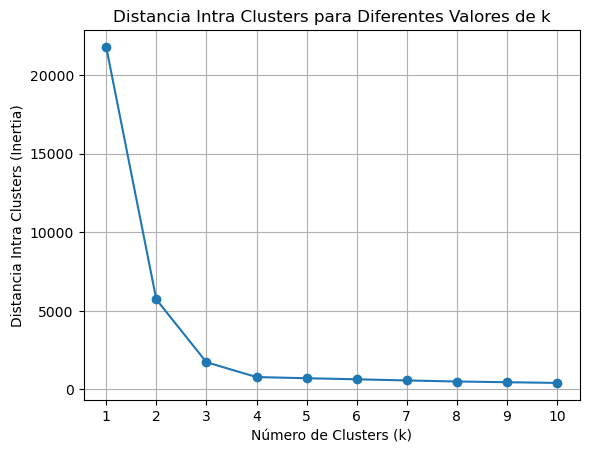

In [7]:
plt.plot(list(inertia_values.keys()), list(inertia_values.values()), marker='o')
plt.title('Distancia Intra Clusters para Diferentes Valores de k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Distancia Intra Clusters (Inertia)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# 2.2 Analisis de clusters

Aplicar el algoritmo k-means a la base de datos k-means2.csv.

In [8]:
kmeans2_data = pd.read_csv('kmeans2.csv')

print(kmeans2_data.head())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(kmeans2_data)


   PAC_EDAD  SATO2  TEMPERATURA  GLASGOW  EVA    HGT    FR  DIAS_HOSP
0        79   89.0         35.8     15.0  3.0  121.0  14.0       21.0
1        35   96.0         36.4     15.0  2.0  121.0  16.0       33.0
2        25   98.0         35.5     15.0  2.0  121.0  18.0       17.0
3        34   98.0         37.0     15.0  2.0  121.0  18.0        1.0
4        45   98.0         36.8     15.0  2.0  121.0  18.0       11.0


Determine el numero de clusters adecuados

In [ ]:
k_values = range(2, 11)
silhouette_scores = []
davies_bouldin_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_data, labels))
    davies_bouldin_scores.append(davies_bouldin_score(scaled_data, labels))

#En esta seccion no pude detener la compilacion, quedo en un loop

Interpretar

In [ ]:
subset_data = scaled_data[:1000]  #Tuve que reducir el tamaño del datafrem


k_values = range(2, 4)  

silhouette_scores = []
davies_bouldin_scores = []

for k in k_values:
    print(f"Calculando k-means para k={k}...")
    kmeans = KMeans(
        n_clusters=k, 
        random_state=42, 
        max_iter=300, 
        init='k-means++'
    )
    kmeans.fit(subset_data)
    labels = kmeans.labels_
    print(f"Silhouette score para k={k} calculado...")
    silhouette_scores.append(silhouette_score(subset_data, labels))
    davies_bouldin_scores.append(davies_bouldin_score(subset_data, labels))
    print(f"Davies-Bouldin score para k={k} calculado...")

print("Silhouette Scores:", silhouette_scores)
print("Davies-Bouldin Scores:", davies_bouldin_scores)

Calculando k-means para k=2...
Silhouette score para k=2 calculado...
Davies-Bouldin score para k=2 calculado...
Calculando k-means para k=3...
Silhouette score para k=3 calculado...
Davies-Bouldin score para k=3 calculado...
Silhouette Scores: [0.6749525438604472, 0.656168373393693]
Davies-Bouldin Scores: [0.5548044367198287, 0.4517296454329432]


c:\Users\user\anaconda3\envs\curso_ciencias_de_datos\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\curso_ciencias_de_datos\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\user\anaconda3\envs\curso_ciencias_de_datos\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\curso_ciencias_de_datos\lib\site-packages\sklearn

# 2.3 Clase k-means

Implementar una clase

In [21]:
class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
        self.labels = None
        self.inertia = None

    def fit(self, data):
        np.random.seed(self.random_state)
        self.centroids = data[np.random.choice(data.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.max_iter):
            distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)
            new_centroids = np.array([data[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids
        self.inertia = np.sum((data - self.centroids[self.labels]) ** 2)

    def predict(self, data):
        distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Ejemplo de uso de la clase
custom_kmeans = CustomKMeans(n_clusters=3, random_state=42)
custom_kmeans.fit(scaled_data)
print("Centroides calculados:\n", custom_kmeans.centroids)


Centroides calculados:
 [[-0.00752077  0.1053027  -0.10243443  0.06811837  0.10475687  1.79636689
  -0.15293089  0.01827151]
 [ 1.05028199 -0.21842567 -0.35046792 -0.14988361  0.31575186 -0.30925746
  -0.27166859 -0.01911644]
 [-0.7201512   0.11589401  0.27457522  0.08087841 -0.25144851 -0.37381285
   0.23684943  0.00718597]]
